## First step  is to visualize the ECoG datasets of the Mouse, from .abf files and write it to excel

In [1]:
import pyabf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd

#List with name of the ECoG files
List_of_files = ["131010_002[1-425]",
                 "131010_003[1-411]",
                 "131011_002[1-432]",
                 "131011_003[1-300]",
                 "131015_001[1-1324]",
                 "131018_004[1-375]",
                 "131024_001.1[1-258]",
                 "131028_001[1-320]",
                 "131029_003[1-289]",
                 "131029_004[1-188]",
                 "131031_001[1-336]",
                 "131103_001[1-454]",
                 "131104_001[1-517]",
                 "131104_002[1-415]"                
                ]

file = ["131010_002[1-425]"]

#read .abf file and obtain time series information about the dataset
def read_abf(abf):
    time = np.array([])                        
    action_potential = np.array([])
    
    #print(abf.headerText)
    for sweep in  abf.sweepList:                  #sweep - is a time window of the signal                        
        abf.setSweep(sweep, absoluteTime = True)
        #write the continious file (time)
        time = np.concatenate((time,abf.sweepX)) 
        #write the continious file (potential pA values)
        action_potential = np.concatenate((action_potential, abf.sweepY))
    return time, action_potential

print("Done preparation of .abf")

Done preparation of .abf


#### Convert .abf to .xlsx

In [ ]:
def convert_abf_to_xls (name_List):
    for name in name_List:
        abf = pyabf.ABF(name + ".abf")
        print(abf)
        dataRate = abf.dataRate
        data = read_abf(abf)
        print("read data")
        #create dataframe with the continious signal
        data_set = pd.DataFrame({'time':data[0], 'U,pA':data[1]})
        print("create data_set")
        #write to excel t and U
        data_set.to_excel(name +".xlsx", index = False)
        print("Done file" + name)
        plt.plot(data[0],data[1])
        plt.show()
        plt.savefig(name+".png")
        print("Image #" + name + "is saved")

convert_abf_to_xls(file)
print("Done convert .abf to .xlsx")

#### Label datasets

In [38]:
import numpy as np
import pandas as pd
import pyabf 


name = ["131010_002[1-425]"]


List_of_files = ["131010_002[1-425]",
                 "131010_003[1-411]",
                 "131011_002[1-432]",
                 "131011_003[1-300]",
                 "131015_001[1-1324]",
                 "131018_004[1-375]",
                 "131024_001.1[1-258]",
                 "131028_001[1-320]",
                 "131029_003[1-289]",
                 "131029_004[1-188]",
                 "131031_001[1-336]",
                 "131103_001[1-454]",
                 "131104_001[1-517]",
                 "131104_002[1-415]"                
                ]

Time_of_seizures = [
                    [(680,780), (820,940), (1000, 1250), (1600,1680), (1890,2050),(2100,2600),(2650,2850),(2900,3400)],
                    [(0,3000)],
                    [(700,740)],
                    [(1600,1720)],
                    [(4800,5800), (6600,7400), (7500,8500), (9000,9500),(9600,10200)],
                    [(2200,2600), (3400,3550)],
                    [(200,350), (450,540), (640,720),(760,805),(850,1100),(1200,2500)],
                    [(2800,3200)],
                    [(1700,2100)],
                    [(420,460),(500,640),(690,810),(910,990),(1050,1300),(1600,1850)],
                    [(1200,1800),(2000,2700),(2700,3100),(3150,3350)],
                    [(1220,1260),(3120,3160)],
                    [(1210,1250)],
                    [(2310,2350),(3650,3750)]                   
]

Seizure_data_frame = pd.DataFrame({"names":List_of_files , "seizure periods": Time_of_seizures})
print(Seizure_data_frame)

name = ["131010_002[1-425]"]

#Labels dataset when the seizures occured in different point of time (0 - no seizure, 1 - seizure)
def create_label_vector (file_name, seizure_data_frame, time_step, t):
    for n in range(len(seizure_data_frame["names"])):              #number of files in dataframe
        if seizure_data_frame.iloc[n,0] == file_name:              #find the specific file name
            print("Name of file is " + file_name)
            seizures_time = seizure_data_frame.iloc[n,1]           #for file_name read the array with time points of seizures      
            temp_vect = np.array(seizures_time)                #put it in numpy array
            #temp_vect = seizures_time.flatten()                    #concatanate this array
            print("This is time_seizure array")
            print(temp_vect)
            n_row = len(temp_vect); n_col = len(temp_vect[0])      #number of rows and col of this array
            print("Rows:" + str(n_row) + " and columns: "+str(n_col))
            labeled_data = np.zeros(len(t))
            for i in range(n_row):
                start_index = int(round(temp_vect[i,0]/time_step))
                end_index = int(round(temp_vect[i,1]/time_step))
                labeled_data[start_index:end_index] = 1
            print("Label vector is created !")
    return labeled_data

def write_label_data_to_xls (name, time, u_signal, labels):
        data_set = pd.DataFrame({"time":time, "U,pA":u_signal, "labels": labels})
        print("Created labeled data_set")
        #write to excel t, U and labels
        data_set.to_excel(name +"_labeled.xlsx", index = False)
        print("Done file" + name)
        
for n in name:
    abf = pyabf.ABF(n + ".abf")
    sampleRate = abf.dataRate
    time_step = round((1/sampleRate), 4)
    data_set = read_abf(abf)
    t = data_set[0]; u = data_set[1]
    labels = create_label_vector(n, Seizure_data_frame,time_step, t)
    write_label_data_to_xls(n,t,u,labels)
    print("Wrote the labeled dataset. Done!")



                  names                                    seizure periods
0     131010_002[1-425]  [(680, 780), (820, 940), (1000, 1250), (1600, ...
1     131010_003[1-411]                                        [(0, 3000)]
2     131011_002[1-432]                                       [(700, 740)]
3     131011_003[1-300]                                     [(1600, 1720)]
4    131015_001[1-1324]  [(4800, 5800), (6600, 7400), (7500, 8500), (90...
5     131018_004[1-375]                       [(2200, 2600), (3400, 3550)]
6   131024_001.1[1-258]  [(200, 350), (450, 540), (640, 720), (760, 805...
7     131028_001[1-320]                                     [(2800, 3200)]
8     131029_003[1-289]                                     [(1700, 2100)]
9     131029_004[1-188]  [(420, 460), (500, 640), (690, 810), (910, 990...
10    131031_001[1-336]  [(1200, 1800), (2000, 2700), (2700, 3100), (31...
11    131103_001[1-454]                       [(1220, 1260), (3120, 3160)]
12    131104_001[1-517]  

In [39]:
List_of_names = ["Hello", "world", "to", "You"]

for i in range(len(List_of_names)):
    List_of_names[i] += "labeled.xlsx"

print(List_of_names)

['Hellolabeled.xlsx', 'worldlabeled.xlsx', 'tolabeled.xlsx', 'Youlabeled.xlsx']


## Second step. Open excel file and do Preprocessing

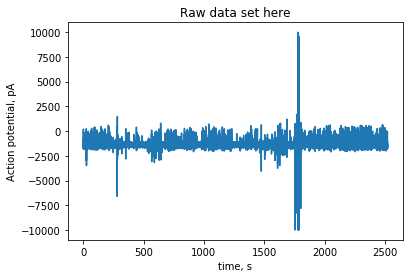

Plot std t and u 
[0.00000000e+00 2.40384615e-03 4.80769231e-03 ... 2.52060577e+03
 2.52060817e+03 2.52061058e+03]
[-0.23089323 -0.23089323 -0.15733812 ... -0.11530663 -0.11005269
 -0.14683025]


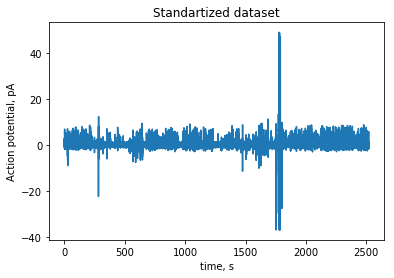

In [19]:
from IPython.core.debugger import set_trace #debugger for jupyter notebook
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import scipy
from sklearn import preprocessing

List_of_files = ["131010_002[1-425]",
                 "131010_003[1-411]",
                 "131011_002[1-432]",
                 "131011_003[1-300]",
                 "131015_001[1-1324]",
                 "131018_004[1-375]",
                 "131024_001.1[1-258]",
                 "131028_001[1-320]",
                 "131029_003[1-289]",
                 "131029_004[1-188]",
                 "131031_001[1-336]",
                 "131103_001[1-454]",
                 "131104_001[1-517]",
                 "131104_002[1-415]"                
                ]

New_labeled_list =[]

files_list = ["temp"]

file_name = "131010_002[1-425]_labeled.xlsx"
temp_file = "temp.xlsx"
'''
for name in List_of_files:
    name = file + "_labeled.xlsx"
    
def open_excel (file_name):
                print("Start to read files")
                file = pd.read_excel(file_name)
                data = np.asarray(file)
                print("Read excel file")
                return data

def plot_data(t_,u_, title):
                plt.title(title)
                plt.plot(t_,u_)
                plt.xlabel("time, s")
                plt.ylabel("Action potential, pA")
                plt.show()
                

#data_set = open_excel(file_name) #numpy_array
data_set = open_excel(file_name) #numpy_array
'''
#function that remove all missing values and replace it with mean values
def check_missing_values(data_set, col2use):
    for n_of_col in col2use:
        x_mean = np.mean(data_set[:,n_of_col])
        data_set[:,n_of_col] = data_set[:,n_of_col].fillna(x_mean)
    return data_set

# a function for standartize data set
def preprocess_dataset(data_set):
    t = data_set[:,0]
    u = data_set[:,1]
    plot_data(t,u,"Raw data set here")
    
    # remove mean and scaling to unit variance
    #x_std = (x-x_mean)/standart deviation, if (x_1,x_2,x_3, ...)
    # scaled_data_set = StandardScaler().fit_transform(data_set)
    t_std = t
    u_std =  preprocessing.scale(u)
    print("Plot std t and u ")
    print(t_std)
    print(u_std)
    plot_data(t_std, u_std, "Standartized dataset")
    return t_std, u_std

#data_set = check_missing_values(data_set)
pr_data_set = preprocess_dataset(data_set)



   ## Step three. Data Analysis. Feature extraction

<class 'tuple'>


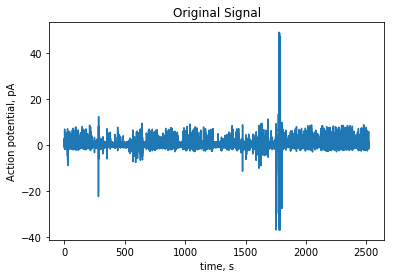

In [22]:
import pywt
import pywt.data
import numpy as np
import matplotlib.pyplot as plt

t_pr = pr_data_set[0]
u_pr = pr_data_set[1]
plot_data(t_pr,u_pr, "Original Signal")
data_u = u_pr


### Features Extraction

In [2]:
import numpy as np
import scipy.stats
import numpy as np
from matplotlib import pyplot as plt
#time-series analysis of data from neuroscience experiments
#http://nipy.org/nitime/
#from nitime import utils
#from nitime import algorithms as alg
#from nitime.timeseries import TimeSeries
#from nitime.viz import plot_tseries
#https://python-scripts.com/import-csv-python
import csv 
import pywt
import scipy.stats as sp
from spectrum import *
from os import listdir
from os.path import isfile, join


feature_names = ["Activity", "Mobility", "complexity", "Kurtosis", "2nd DiffMean, 2ndDiffMin",
                "CoeffOfVariation", "Skewness", "WvMean", "WvStdDeviation", "WvApprEnergy", 
                 "FFTPowerDelta", "FFTPowerTheta", "FFTPowerAlpha", "FFTPowerBeta"]

#### I. Hjorth Parameters

In [ ]:
#https://en.wikipedia.org/wiki/Hjorth_parameters
#main formulas of Hjorth parameters

def hjorth(data_u):
    u_input = data_u
    hjorth_activity = np.zeros(len(u_input))
    hjorth_mobility = np.zeros(len(u_input))
    hjorth_diffmobility = np.zeros(len(u_input))
    hjorth_complexity = np.zeros(len(u_input))
  
    diff_u_input = np.diff(u_input) #x[n+1] - x[n]
    k=0
    
    for x in u_input:
        hjorth_activity[k] = np.var(x) #var = mean(abs(x - x.mean())**2)
        hjorth_mobility[k] = np.sqrt(np.var(diff_u_input[k])/hjorth_activity[k])
        hjorth_diffmobility[k] = np.sqrt(np.var(diff_u_input[k])/np.var(diff_u_input))
        hjorth_complexity[k] = hjorth_diffmobility[k]/hjorth_mobility[k]
        k=k+1
    return np.sum()

### Time-frequency domain (Discrete Wavelet Transform)

In [3]:


# -------------- Time domain ----------------# 
def mean_signal(t, u_x, e):
    return np.mean(u_x)

def std_signal(t, u_x, e):
    return np.std(u_x)

def mean_square_signal(t, u_x, e):
    return np.mean(u_x ** 2)

def abs_diffs_signal(t, u_x, e):
    return np.sum(np.abs(np.diff(u_x)))

def skew_signal(t, u_x, e):
    return scipy.stats.skew(u_x)

# -------------- Frequency domain ----------------#
#band power - average power of a signal in a specific frequency range
